In [1]:
# installing 1.0.3 because this version of pandas supports write to s3
!pip install pandas==1.0.3

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
# This path will be active after the launch of the hackathon / day-day-up-unsw / s3://tf-trachack-notebooks/day-day-up-unsw/jupyter/jovyan/
teamname = 'day-day-up-unsw' #'trachack-a-groups-admin-py-tracfone'
data_folder='s3://tf-trachack-data/212/'
# change root_folder to your team's root folder
# s3://tf-trachack-notebooks/<this should be replaced by team name as provided in EMAIL>/jupyter/jovyan/
root_folder='s3://tf-trachack-notebooks/'+teamname+'/jupyter/jovyan/'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from pandas import to_datetime

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [4]:
upgrades=pd.read_csv(data_folder+"data/dev/upgrades.csv")
customer_info=pd.read_csv(data_folder+"data/dev/customer_info.csv")

In [5]:
upgrade_customer_info = pd.merge(upgrades, customer_info, on = 'line_id', how = 'inner')

In [6]:
upgrades_eval=pd.read_csv(data_folder+"data/eval/upgrades.csv")
customer_info_eval=pd.read_csv(data_folder+"data/eval/customer_info.csv")

In [7]:
upgrade_customer_info_eval = pd.merge(upgrades_eval, customer_info_eval, on = 'line_id', how = 'inner')

In [8]:
upgrade_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   line_id                55868 non-null  object
 1   date_observed          55868 non-null  object
 2   upgrade                55868 non-null  object
 3   carrier                55868 non-null  object
 4   first_activation_date  55147 non-null  object
 5   plan_name              42012 non-null  object
 6   plan_subtype           42012 non-null  object
 7   redemption_date        42012 non-null  object
dtypes: object(8)
memory usage: 3.8+ MB


In [9]:
upgrade_customer_info_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37155 entries, 0 to 37154
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   line_id                37155 non-null  object
 1   date_observed          37155 non-null  object
 2   carrier                37155 non-null  object
 3   first_activation_date  36671 non-null  object
 4   plan_name              27888 non-null  object
 5   plan_subtype           27888 non-null  object
 6   redemption_date        27888 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


Text(0.5, 1.0, 'carrier')

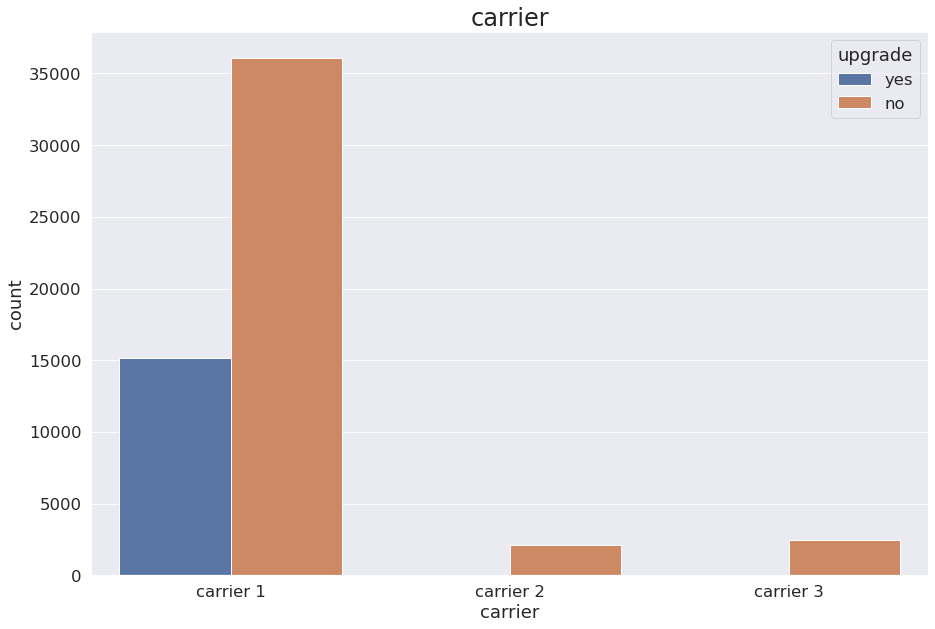

In [10]:
df = upgrade_customer_info.sort_values(by='carrier')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='carrier')
sns.set(font_scale=2.0)
plt.title('carrier')

Text(0.5, 1.0, 'carrier')

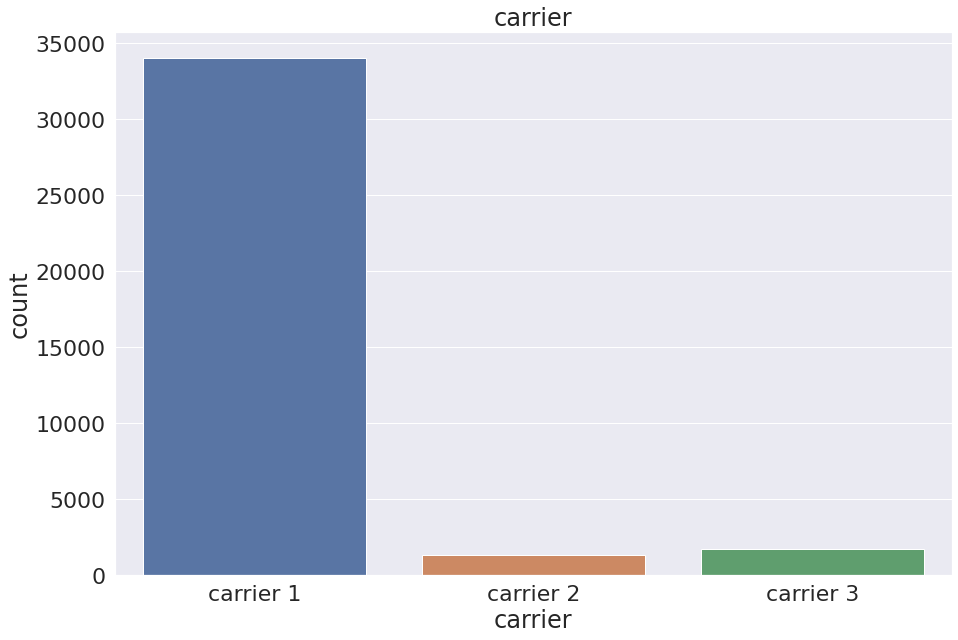

In [11]:
df = upgrade_customer_info_eval.sort_values(by='carrier')
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='carrier')
sns.set(font_scale=2.0)
plt.title('carrier')

Text(0.5, 1.0, 'plan_name')

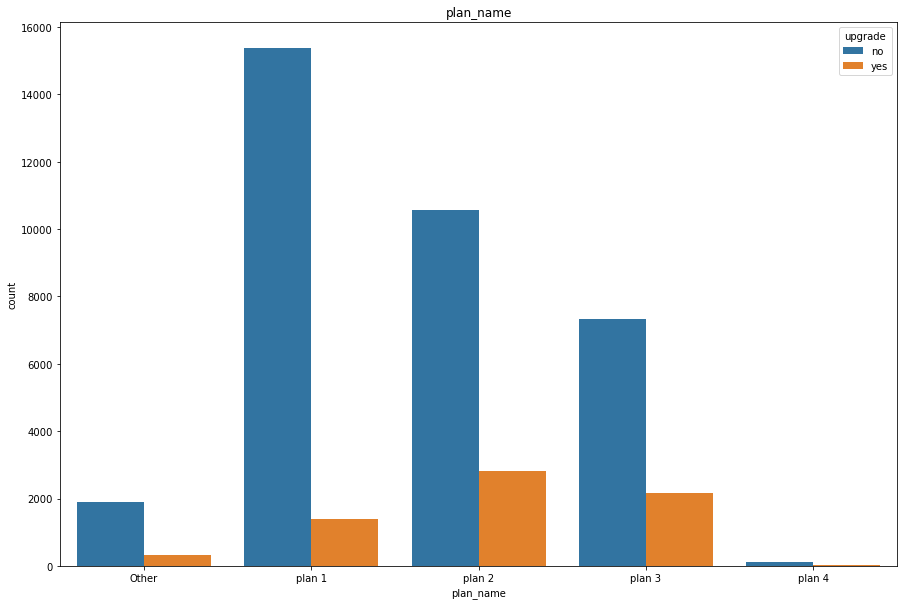

In [10]:
df = upgrade_customer_info.sort_values(by='plan_name')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='plan_name')
plt.title('plan_name')

Text(0.5, 1.0, 'plan_name')

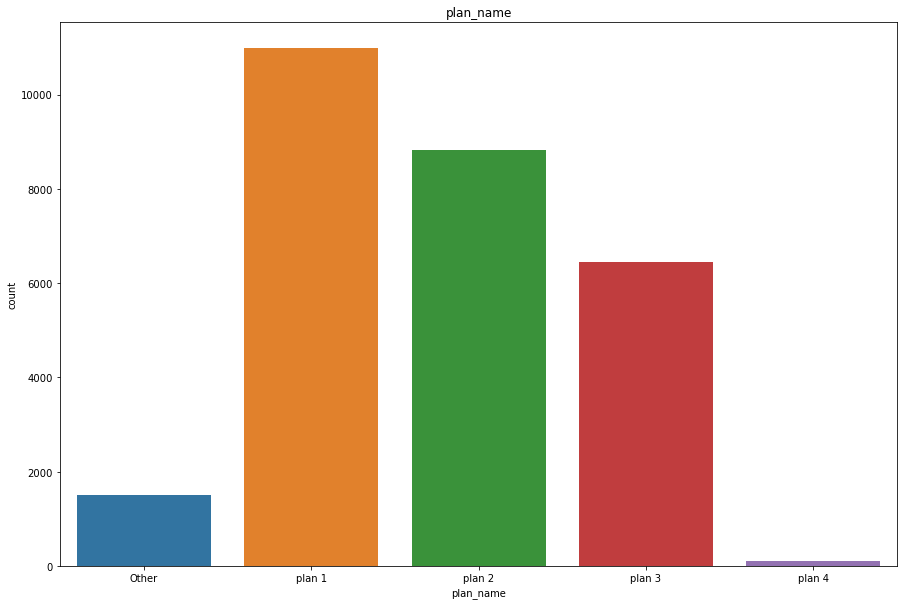

In [11]:
df = upgrade_customer_info_eval.sort_values(by='plan_name')
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='plan_name')
plt.title('plan_name')

In [12]:
upgrade_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   line_id                55868 non-null  object
 1   date_observed          55868 non-null  object
 2   upgrade                55868 non-null  object
 3   carrier                55868 non-null  object
 4   first_activation_date  55147 non-null  object
 5   plan_name              42012 non-null  object
 6   plan_subtype           42012 non-null  object
 7   redemption_date        42012 non-null  object
dtypes: object(8)
memory usage: 3.8+ MB


Text(0.5, 1.0, 'first_activation_date')

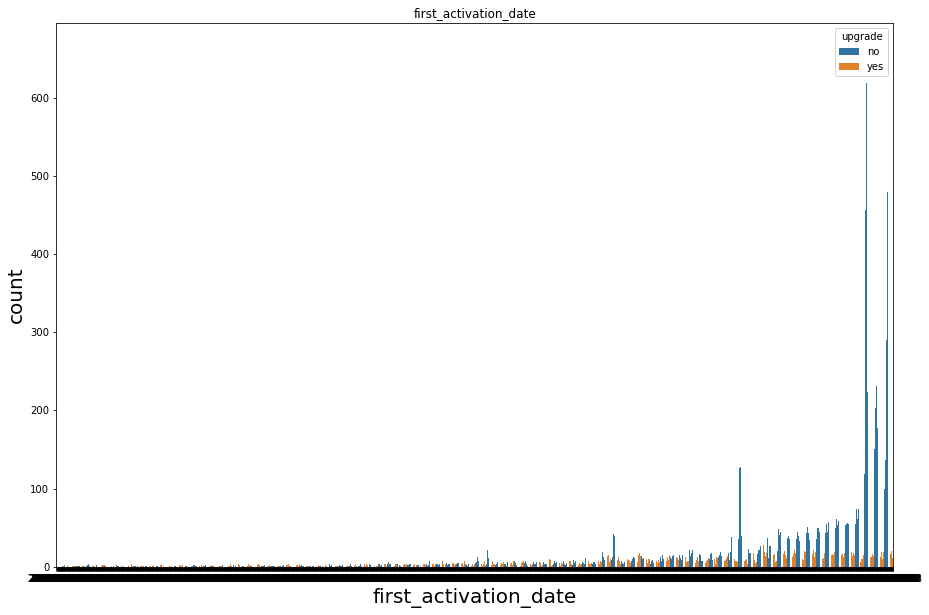

In [8]:
df = upgrade_customer_info.sort_values(by='first_activation_date')
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='first_activation_date')
plt.title('first_activation_date')

<Figure size 1080x720 with 0 Axes>

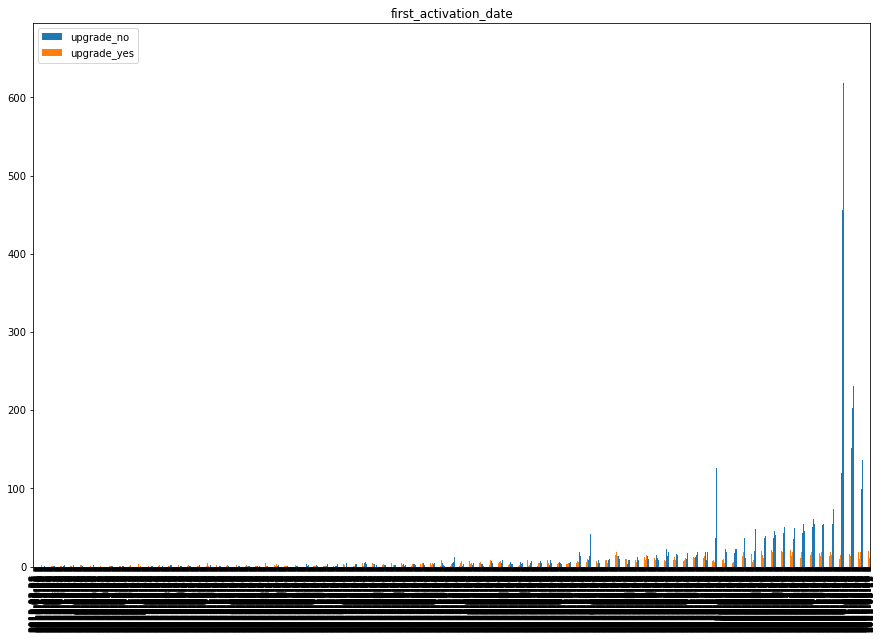

In [14]:
upgrade_customer_info_no = upgrade_customer_info.first_activation_date[upgrade_customer_info.upgrade == 'no'].value_counts()
upgrade_customer_info_yes = upgrade_customer_info.first_activation_date[upgrade_customer_info.upgrade == 'yes'].value_counts()
plt.figure(figsize=(15,10))
info = pd.DataFrame({'upgrade_no': upgrade_customer_info_no, 'upgrade_yes': upgrade_customer_info_yes})
info.plot(kind='bar', figsize=(15,10))
plt.title('first_activation_date')
plt.show()

Text(0.5, 1.0, 'redemption_date')

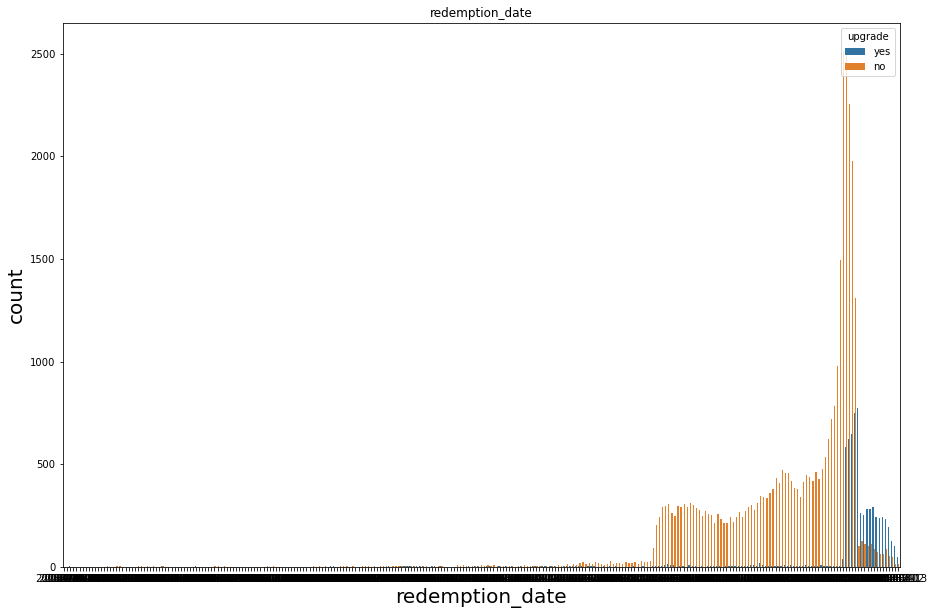

In [9]:
df = upgrade_customer_info.sort_values(by='redemption_date')
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1, 1, figsize=(15,10))
# ax = plt.subplot(111)
ax.set_xlabel('date', fontsize=20)
ax.set_ylabel('count', fontsize=20)
sns.countplot(data=df, hue="upgrade", x='redemption_date')
plt.title('redemption_date')

Text(0.5, 1.0, 'plan_subtype')

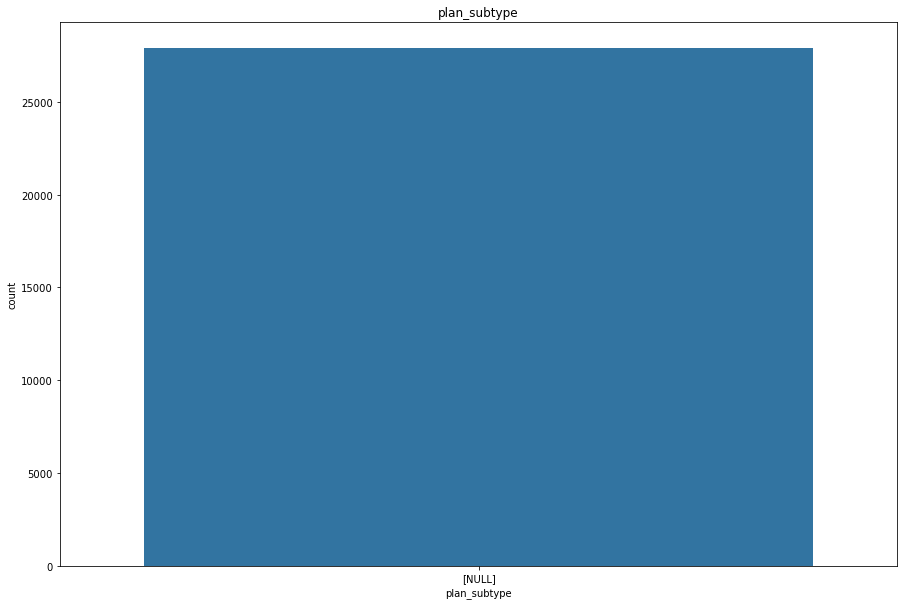

In [16]:
df = upgrade_customer_info_eval.sort_values(by='plan_subtype')
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='plan_subtype')
plt.title('plan_subtype')

Text(0.5, 1.0, 'date_observed')

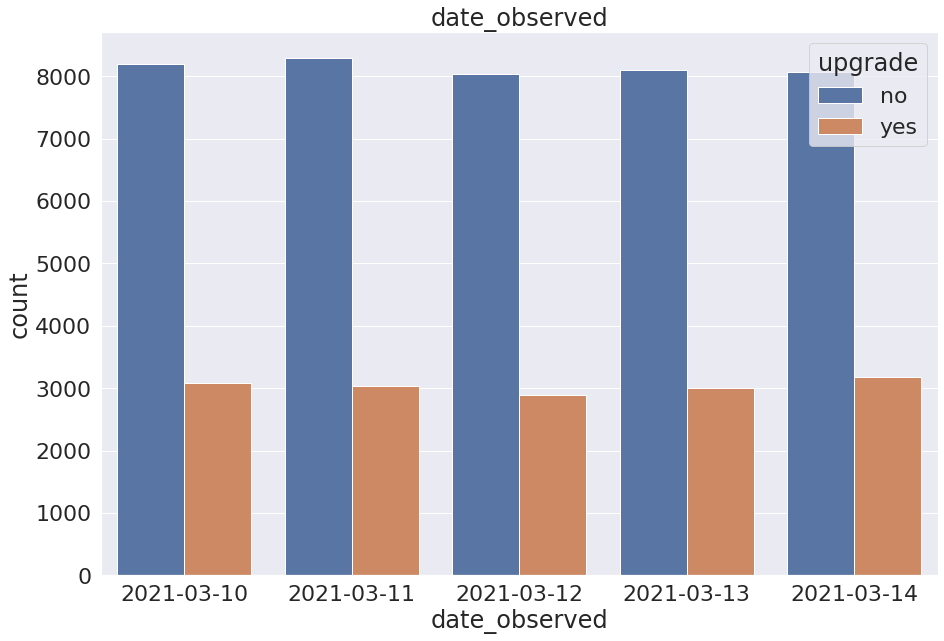

In [12]:
df = upgrade_customer_info.sort_values(by='date_observed')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='date_observed')
sns.set(font_scale=2.0)
plt.title('date_observed')

Text(0.5, 1.0, 'plan_subtype')

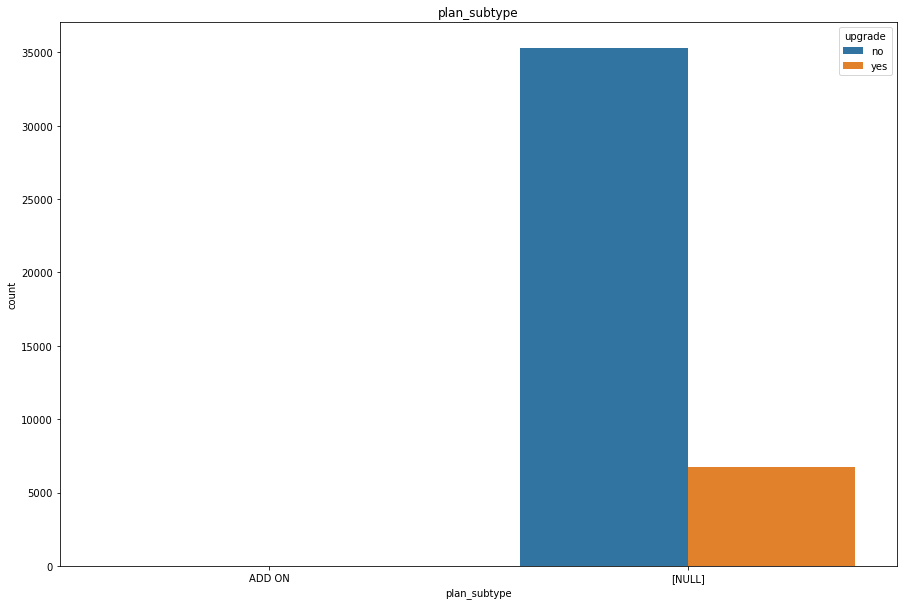

In [18]:
df = upgrade_customer_info.sort_values(by='plan_subtype')
plt.figure(figsize=(15,10))
sns.countplot(data=df, hue="upgrade", x='plan_subtype')
plt.title('plan_subtype')

In [19]:
len(upgrade_customer_info.groupby('line_id')['redemption_date'].value_counts())

42012

In [20]:
upgrade_customer_info_eval.plan_subtype

0        [NULL]
1        [NULL]
2        [NULL]
3        [NULL]
4        [NULL]
          ...  
37150    [NULL]
37151    [NULL]
37152    [NULL]
37153       NaN
37154    [NULL]
Name: plan_subtype, Length: 37155, dtype: object

In [21]:
len(upgrade_customer_info.first_activation_date.value_counts())

2425

In [22]:
upgrade_customer_info[upgrade_customer_info['first_activation_date'].isnull()]

,line_id,date_observed,upgrade,carrier,first_activation_date,plan_name,plan_subtype,redemption_date
75,b597f115-fd32-474e-a405-63793067f884,2021-03-13,yes,carrier 1,NaN,NaN,NaN,NaN
88,57fa2fb6-aad5-4cb7-a8e7-fb4929c8eb36,2021-03-13,no,carrier 1,NaN,NaN,NaN,NaN
128,94d035d4-1be7-4f9b-8b3d-f86600f95380,2021-03-13,yes,carrier 1,NaN,NaN,NaN,NaN
155,db676e50-d8ee-49cb-b983-13e6a86975e4,2021-03-13,yes,carrier 1,NaN,NaN,NaN,NaN
170,e08bb419-8c7a-4429-9fd1-6808208a66aa,2021-03-14,no,carrier 1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
55641,8bc99bc5-c621-40e5-8fdc-ffee27a779d5,2021-03-14,yes,carrier 1,NaN,NaN,NaN,NaN
55642,04479546-7bc1-4eb9-a2e3-b82e336255f2,2021-03-12,yes,carrier 1,NaN,NaN,NaN,NaN
55697,42355ede-8700-444b-a2f5-d1bdc5a25ddb,2021-03-14,no,carrier 1,NaN,NaN,NaN,NaN
55713,774211e2-6b28-4b33-873b-4aecf2d89663,2021-03-12,yes,carrier 1,NaN,NaN,NaN,NaN


In [23]:
upgrade_customer_info[upgrade_customer_info['first_activation_date'].notnull()]

,line_id,date_observed,upgrade,carrier,first_activation_date,plan_name,plan_subtype,redemption_date
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,carrier 1,2018-08-06,NaN,NaN,NaN
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,carrier 1,2019-04-11,NaN,NaN,NaN
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,carrier 1,2020-09-16,NaN,NaN,NaN
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,carrier 1,2021-01-28,plan 1,[NULL],2021-02-26
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,carrier 1,2020-08-31,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
55863,f89b108a-f453-4419-a4dc-5bf8e1cd1f1a,2021-03-11,no,carrier 1,2020-09-20,Other,[NULL],2020-12-26
55864,b703f1d4-57ba-48b6-8adf-46d7aba6a406,2021-03-13,no,carrier 1,2019-05-03,plan 3,[NULL],2021-02-19
55865,e3b2212c-906e-4a8f-8307-6b88fc64d7a0,2021-03-11,no,carrier 1,2021-01-16,NaN,NaN,NaN
55866,828df9bf-279c-47c3-96c2-92177a50b8fd,2021-03-14,no,carrier 1,2021-01-24,plan 1,[NULL],2021-02-24


In [24]:
columns = upgrade_customer_info.columns
columns

Index(['line_id', 'date_observed', 'upgrade', 'carrier',
       'first_activation_date', 'plan_name', 'plan_subtype',
       'redemption_date'],
      dtype='object')

# Data processing

In [25]:
# df = upgrade_customer_info

In [26]:
# df_full=df.drop(labels='first_activation_date',axis=1)
# df_full=df.drop(columns=['first_activation_date', 'plan_name', ''],axis=1)
# df_full

In [27]:
# df_nan=df.loc[:,'填充列']
# df_nan

In [28]:
#区别我们的训练集和测试集
# Ytrain = df_nan[df_nan.notnull()]
# Ytest = df_nan[df_nan.isnull()]
# Xtrain = df_full.iloc[Ytrain.index]
# Xtest = df_full.iloc[Ytest.index]

In [29]:
#用随机森林回归来填补缺失值
# rfc = RandomForestRegressor(n_estimators=100)
# rfc = rfc.fit(Xtrain, Ytrain)
# Ypredict = rfc.predict(Xtest)

In [30]:
# Ypredict

In [31]:
# 

# first_activation_date - Dealing with missing values
# upgrade_customer_info.loc[:, 'first_activation_date'].fillna("0-0-0", inplace=True)

# first_activation_date - Do standardization processing for month, year and day respectively
# data = upgrade_customer_info.loc[:, 'first_activation_date']
# upgrade_customer_info.loc[:,'first_activation_year'] = data.apply(lambda x:str(x).split('-')[0])
# data = upgrade_customer_info.loc[:, 'first_activation_date']
# upgrade_customer_info.loc[:,'first_activation_month'] = data.apply(lambda x:str(x).split('-')[1])
# data = upgrade_customer_info.loc[:, 'first_activation_date']
# upgrade_customer_info.loc[:,'first_activation_day'] = data.apply(lambda x:str(x).split('-')[2])
# upgrade_customer_info.loc[:,'first_activation_year'].replace('0', np.nan, inplace=True)
# upgrade_customer_info.loc[:,'first_activation_month'].replace('0', np.nan, inplace=True)
# upgrade_customer_info.loc[:,'first_activation_day'].replace('0', np.nan, inplace=True)



# data = fill_miss_byRandomForest(upgrade_customer_info, 'first_activation_year', ['first_activation_month', 'first_activation_day', 'date_observed', 'first_activation_date', 'line_id', 'plan_name', 'plan_subtype', 'redemption_date'])
# data

# st=StandardScaler()
# data=st.fit_transform(upgrade_customer_info.loc[:,['first_activation_year', 'first_activation_month', 'first_activation_day']])
# upgrade_customer_info.loc[:,'first_activation_year'] = data[:, 0]
# upgrade_customer_info.loc[:,'first_activation_month'] = data[:, 1]
# upgrade_customer_info.loc[:,'first_activation_day'] = data[:, 2]

# upgrade_redemptions_eval.loc[:,'first_activation_year'] = upgrade_redemptions_eval['first_activation_date'].apply(lambda x:x.split('-')[0])
# upgrade_redemptions_eval.loc[:,'first_activation_month'] = upgrade_redemptions_eval['first_activation_date'].apply(lambda x:x.split('-')[1])
# upgrade_redemptions_eval.loc[:,'first_activation_day'] = upgrade_redemptions_eval['first_activation_date'].apply(lambda x:x.split('-')[2])
# st=StandardScaler()
# data=st.fit_transform(upgrade_redemptions_eval.loc[:,['first_activation_year', 'first_activation_month', 'first_activation_day']])
# upgrade_redemptions_eval.loc[:,'first_activation_year'] = data[:, 0]
# upgrade_redemptions_eval.loc[:,'first_activation_month'] = data[:, 1]
# upgrade_redemptions_eval.loc[:,'first_activation_day'] = data[:, 2]


# 
# upgrade_customer_info[upgrade_customer_info.loc[:, 'upgrade'] == 'yes'] = 1
# upgrade_customer_info[upgrade_customer_info.loc[:, 'upgrade'] == 'no'] = 0

## first_activation_date

In [32]:
#Train
upgrade_customer_info.loc[:, 'first_activation_date'].fillna("0-0-0", inplace=True)

#Eval
upgrade_customer_info_eval.loc[:, 'first_activation_date'].fillna("0-0-0", inplace=True)

In [33]:
#Train
data = upgrade_customer_info.loc[:, 'first_activation_date']
upgrade_customer_info['first_activation_year'] = data.apply(lambda x:str(x).split('-')[0])

#Eval
data = upgrade_customer_info_eval.loc[:, 'first_activation_date']
upgrade_customer_info_eval['first_activation_year'] = data.apply(lambda x:str(x).split('-')[0])

In [34]:
#Train
data = upgrade_customer_info.loc[:, 'first_activation_date']
upgrade_customer_info['first_activation_month'] = data.apply(lambda x:str(x).split('-')[1])

#Eval
data = upgrade_customer_info_eval.loc[:, 'first_activation_date']
upgrade_customer_info_eval['first_activation_month'] = data.apply(lambda x:str(x).split('-')[1])

In [35]:
#Train
data = upgrade_customer_info.loc[:, 'first_activation_date']
upgrade_customer_info['first_activation_day'] = data.apply(lambda x:str(x).split('-')[2])

#Eval
data = upgrade_customer_info_eval.loc[:, 'first_activation_date']
upgrade_customer_info_eval['first_activation_day'] = data.apply(lambda x:str(x).split('-')[2])

In [36]:
#Train
upgrade_customer_info.loc[:,'first_activation_year'].replace('0', np.nan, inplace=True)
upgrade_customer_info.loc[:,'first_activation_month'].replace('0', np.nan, inplace=True)
upgrade_customer_info.loc[:,'first_activation_day'].replace('0', np.nan, inplace=True)

#Eval
upgrade_customer_info_eval.loc[:,'first_activation_year'].replace('0', np.nan, inplace=True)
upgrade_customer_info_eval.loc[:,'first_activation_month'].replace('0', np.nan, inplace=True)
upgrade_customer_info_eval.loc[:,'first_activation_day'].replace('0', np.nan, inplace=True)

In [37]:
sum(upgrade_customer_info.loc[:,'first_activation_month'].value_counts())

55147

In [38]:
upgrade_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   line_id                 55868 non-null  object
 1   date_observed           55868 non-null  object
 2   upgrade                 55868 non-null  object
 3   carrier                 55868 non-null  object
 4   first_activation_date   55868 non-null  object
 5   plan_name               42012 non-null  object
 6   plan_subtype            42012 non-null  object
 7   redemption_date         42012 non-null  object
 8   first_activation_year   55147 non-null  object
 9   first_activation_month  55147 non-null  object
 10  first_activation_day    55147 non-null  object
dtypes: object(11)
memory usage: 5.1+ MB


In [39]:
#Train
st=StandardScaler()
data=st.fit_transform(upgrade_customer_info.loc[:,['first_activation_year', 'first_activation_month', 'first_activation_day']])
upgrade_customer_info.loc[:,'first_activation_year'] = data[:, 0]
upgrade_customer_info.loc[:,'first_activation_month'] = data[:, 1]
upgrade_customer_info.loc[:,'first_activation_day'] = data[:, 2]

#Eval
st=StandardScaler()
data=st.fit_transform(upgrade_customer_info_eval.loc[:,['first_activation_year', 'first_activation_month', 'first_activation_day']])
upgrade_customer_info_eval.loc[:,'first_activation_year'] = data[:, 0]
upgrade_customer_info_eval.loc[:,'first_activation_month'] = data[:, 1]
upgrade_customer_info_eval.loc[:,'first_activation_day'] = data[:, 2]

In [40]:
upgrade_customer_info.head(5)

,line_id,date_observed,upgrade,carrier,first_activation_date,plan_name,plan_subtype,redemption_date,first_activation_year,first_activation_month,first_activation_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,carrier 1,2018-08-06,NaN,NaN,NaN,-1.220132,0.370472,-1.192224
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,carrier 1,2019-04-11,NaN,NaN,NaN,-0.463805,-0.605880,-0.637264
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,carrier 1,2020-09-16,NaN,NaN,NaN,0.292522,0.614559,-0.082304
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,carrier 1,2021-01-28,plan 1,[NULL],2021-02-26,1.048849,-1.338143,1.249601
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,carrier 1,2020-08-31,NaN,NaN,NaN,0.292522,0.370472,1.582577


In [41]:
# 缺失值处理
data = upgrade_customer_info.loc[:,['first_activation_year', 'first_activation_month', 'first_activation_day']]
im = SimpleImputer(missing_values=np.nan, strategy='mean')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)

upgrade_customer_info.loc[:,'first_activation_year'] = data[:, 0]
upgrade_customer_info.loc[:,'first_activation_month'] = data[:, 1]
upgrade_customer_info.loc[:,'first_activation_day'] = data[:, 2]

#Eval
data = upgrade_customer_info_eval.loc[:,['first_activation_year', 'first_activation_month', 'first_activation_day']]
im = SimpleImputer(missing_values=np.nan, strategy='mean')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)

upgrade_customer_info_eval.loc[:,'first_activation_year'] = data[:, 0]
upgrade_customer_info_eval.loc[:,'first_activation_month'] = data[:, 1]
upgrade_customer_info_eval.loc[:,'first_activation_day'] = data[:, 2]

In [42]:
upgrade_customer_info.head(5)

,line_id,date_observed,upgrade,carrier,first_activation_date,plan_name,plan_subtype,redemption_date,first_activation_year,first_activation_month,first_activation_day
0,f0b99d3b-32f7-4464-8fa8-87f27c9810a8,2021-03-14,yes,carrier 1,2018-08-06,NaN,NaN,NaN,-1.220132,0.370472,-1.192224
1,a2ec0baf-1720-4b1b-bfa3-db00ac8fcb00,2021-03-10,yes,carrier 1,2019-04-11,NaN,NaN,NaN,-0.463805,-0.605880,-0.637264
2,dd3a01a3-7baf-4605-9799-ce434328a20d,2021-03-10,no,carrier 1,2020-09-16,NaN,NaN,NaN,0.292522,0.614559,-0.082304
3,5cf5917c-f407-4cc7-9d6d-dafe8ec0eccc,2021-03-13,no,carrier 1,2021-01-28,plan 1,[NULL],2021-02-26,1.048849,-1.338143,1.249601
4,6437fcbd-02c4-4c52-b5b2-f7e535ecec47,2021-03-10,yes,carrier 1,2020-08-31,NaN,NaN,NaN,0.292522,0.370472,1.582577


## redemption_date

In [43]:
#Train
upgrade_customer_info.loc[:, 'redemption_date'].fillna("0-0-0", inplace=True)

#Eval
upgrade_customer_info_eval.loc[:, 'redemption_date'].fillna("0-0-0", inplace=True)

In [44]:
#Train
data = upgrade_customer_info.loc[:, 'redemption_date']
upgrade_customer_info.loc[:,'customer_redemption_year'] = data.apply(lambda x:str(x).split('-')[0])

#Eval
data = upgrade_customer_info_eval.loc[:, 'redemption_date']
upgrade_customer_info_eval.loc[:,'customer_redemption_year'] = data.apply(lambda x:str(x).split('-')[0])

In [45]:
#Train
data = upgrade_customer_info.loc[:, 'redemption_date']
upgrade_customer_info.loc[:,'customer_redemption_month'] = data.apply(lambda x:str(x).split('-')[1])

#Eval
data = upgrade_customer_info_eval.loc[:, 'redemption_date']
upgrade_customer_info_eval.loc[:,'customer_redemption_month'] = data.apply(lambda x:str(x).split('-')[1])

In [46]:
#Train
data = upgrade_customer_info.loc[:, 'redemption_date']
upgrade_customer_info.loc[:,'customer_redemption_day'] = data.apply(lambda x:str(x).split('-')[2])

#Eval
data = upgrade_customer_info_eval.loc[:, 'redemption_date']
upgrade_customer_info_eval.loc[:,'customer_redemption_day'] = data.apply(lambda x:str(x).split('-')[2])

In [47]:
#Train
upgrade_customer_info.loc[:,'customer_redemption_year'].replace('0', np.nan, inplace=True)
upgrade_customer_info.loc[:,'customer_redemption_month'].replace('0', np.nan, inplace=True)
upgrade_customer_info.loc[:,'customer_redemption_day'].replace('0', np.nan, inplace=True)

#Eval
upgrade_customer_info_eval.loc[:,'customer_redemption_year'].replace('0', np.nan, inplace=True)
upgrade_customer_info_eval.loc[:,'customer_redemption_month'].replace('0', np.nan, inplace=True)
upgrade_customer_info_eval.loc[:,'customer_redemption_day'].replace('0', np.nan, inplace=True)

In [48]:
#Train
st=StandardScaler()
data=st.fit_transform(upgrade_customer_info.loc[:,['customer_redemption_year', 'customer_redemption_month', 'customer_redemption_day']])
upgrade_customer_info.loc[:,'customer_redemption_year'] = data[:, 0]
upgrade_customer_info.loc[:,'customer_redemption_month'] = data[:, 1]
upgrade_customer_info.loc[:,'customer_redemption_day'] = data[:, 2]

#Eval
st=StandardScaler()
data=st.fit_transform(upgrade_customer_info_eval.loc[:,['customer_redemption_year', 'customer_redemption_month', 'customer_redemption_day']])
upgrade_customer_info_eval.loc[:,'customer_redemption_year'] = data[:, 0]
upgrade_customer_info_eval.loc[:,'customer_redemption_month'] = data[:, 1]
upgrade_customer_info_eval.loc[:,'customer_redemption_day'] = data[:, 2]

In [49]:
# 缺失值处理
data = upgrade_customer_info.loc[:,['customer_redemption_year', 'customer_redemption_month', 'customer_redemption_day']]
im = SimpleImputer(missing_values=np.nan, strategy='mean')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
upgrade_customer_info.loc[:,'customer_redemption_year'] = data[:, 0]
upgrade_customer_info.loc[:,'customer_redemption_month'] = data[:, 1]
upgrade_customer_info.loc[:,'customer_redemption_day'] = data[:, 2]

#Eval
data = upgrade_customer_info_eval.loc[:,['customer_redemption_year', 'customer_redemption_month', 'customer_redemption_day']]
im = SimpleImputer(missing_values=np.nan, strategy='mean')
# im = KNNImputer(n_neighbors=2)
data = im.fit_transform(data)
upgrade_customer_info_eval.loc[:,'customer_redemption_year'] = data[:, 0]
upgrade_customer_info_eval.loc[:,'customer_redemption_month'] = data[:, 1]
upgrade_customer_info_eval.loc[:,'customer_redemption_day'] = data[:, 2]

## plan_name

In [50]:
upgrade_customer_info['plan_name']

0           NaN
1           NaN
2           NaN
3        plan 1
4           NaN
          ...  
55863     Other
55864    plan 3
55865       NaN
55866    plan 1
55867    plan 2
Name: plan_name, Length: 55868, dtype: object

In [51]:
upgrade_customer_info['plan_name'].value_counts()

plan 1    16767
plan 2    13386
plan 3     9502
Other      2212
plan 4      145
Name: plan_name, dtype: int64

In [52]:
upgrade_customer_info_eval['plan_name'].value_counts()

plan 1    10984
plan 2     8830
plan 3     6454
Other      1514
plan 4      106
Name: plan_name, dtype: int64

In [53]:
#Train
upgrade_customer_info['plan_name'].fillna('N', inplace=True)

#Eval
upgrade_customer_info_eval['plan_name'].fillna('N', inplace=True)

In [54]:
upgrade_customer_info['plan_name'].value_counts()

plan 1    16767
N         13856
plan 2    13386
plan 3     9502
Other      2212
plan 4      145
Name: plan_name, dtype: int64

In [55]:
#Train

oh = OneHotEncoder(sparse = False)
contents = oh.fit_transform(upgrade_customer_info.loc[:, ['plan_name']])

n_samples = contents.shape[1]
plan_field = []
for i in range(n_samples):
    s = 'plan_' + str(i)
    plan_field.append(s)
    
for i in range(n_samples):
    upgrade_customer_info[plan_field[i]] = contents[:, i]

#Eavlation data set
oh = OneHotEncoder(sparse = False)
contents = oh.fit_transform(upgrade_customer_info_eval.loc[:, ['plan_name']])

n_samples = contents.shape[1]
plan_field = []
for i in range(n_samples):
    s = 'plan_' + str(i)
    plan_field.append(s)
    
for i in range(n_samples):
    upgrade_customer_info_eval[plan_field[i]] = contents[:, i]

## carrier

In [56]:
#Train
oh = OneHotEncoder(sparse = False)
contents = oh.fit_transform(upgrade_customer_info.loc[:, ['carrier']])

n_samples = contents.shape[1]
carrier_field = []
for i in range(n_samples):
    s = 'carrier_' + str(i)
    carrier_field.append(s)
    
for i in range(n_samples):
    upgrade_customer_info[carrier_field[i]] = contents[:, i]

#Eavlation data set
oh = OneHotEncoder(sparse = False)
contents = oh.fit_transform(upgrade_customer_info_eval.loc[:, ['carrier']])

n_samples = contents.shape[1]
carrier_field = []
for i in range(n_samples):
    s = 'carrier_' + str(i)
    carrier_field.append(s)
    
for i in range(n_samples):
    upgrade_customer_info_eval[carrier_field[i]] = contents[:, i]

In [57]:
upgrade_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55868 entries, 0 to 55867
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    55868 non-null  object 
 1   date_observed              55868 non-null  object 
 2   upgrade                    55868 non-null  object 
 3   carrier                    55868 non-null  object 
 4   first_activation_date      55868 non-null  object 
 5   plan_name                  55868 non-null  object 
 6   plan_subtype               42012 non-null  object 
 7   redemption_date            55868 non-null  object 
 8   first_activation_year      55868 non-null  float64
 9   first_activation_month     55868 non-null  float64
 10  first_activation_day       55868 non-null  float64
 11  customer_redemption_year   55868 non-null  float64
 12  customer_redemption_month  55868 non-null  float64
 13  customer_redemption_day    55868 non-null  flo

In [58]:
upgrade_customer_info_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37155 entries, 0 to 37154
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   line_id                    37155 non-null  object 
 1   date_observed              37155 non-null  object 
 2   carrier                    37155 non-null  object 
 3   first_activation_date      37155 non-null  object 
 4   plan_name                  37155 non-null  object 
 5   plan_subtype               27888 non-null  object 
 6   redemption_date            37155 non-null  object 
 7   first_activation_year      37155 non-null  float64
 8   first_activation_month     37155 non-null  float64
 9   first_activation_day       37155 non-null  float64
 10  customer_redemption_year   37155 non-null  float64
 11  customer_redemption_month  37155 non-null  float64
 12  customer_redemption_day    37155 non-null  float64
 13  plan_0                     37155 non-null  flo

In [59]:
upgrade_customer_info = upgrade_customer_info.drop(columns=['upgrade', 'plan_subtype', 'date_observed', 'carrier', 'first_activation_date', 'plan_name', 'redemption_date'])
upgrade_customer_info_eval = upgrade_customer_info_eval.drop(columns=['plan_subtype', 'date_observed', 'carrier', 'first_activation_date', 'plan_name', 'redemption_date'])


In [60]:
# upgrade_customer_info.to_csv(root_folder+"code/data/dev/customer_info_new.csv", header=True,index=None)
# upgrade_customer_info_eval.to_csv(root_folder+"code/data/eval/customer_info_new_eval.csv", header=True,index=None)